 <h1><center>NBA Offseason 2018</center></h1>
 <h2><center>Samad Patel</center></h2>
![NBA Offseason](https://moderatespice.com/wp-content/uploads/2018/07/Screen-Shot-2018-07-05-at-7.38.06-PM.png)

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

# Abstract

The NBA Offseason is an incredibly exciting time. Trades, drafts, (the previous year's awards for some reason) and free-agents dominate the NBA media landscape and captivate the attention of fans around the world. 

With each decision and change, fan reactions can be incredibly diverse. The purpose of this project is to analyze fan reactions to various free-agent decisions. The fan reactions will be taken from threads in the NBA subreddit (reddit.com/r/nba). 

I will use sentiment analysis with the Natural Language Toolkit (nltk) to determine fan reactions. I will only use first-level comments, or, in other words, the comments at the top of the threads. The reasoning behind this is that top-level comments are more likely to be purely reactionary, whereas comments later in threads tend to diverge in topic. 

I will run the comments through the sentiment analysis model to determine whether or not the reaction is positive or negative. Then I will weight the reaction based on the score of the comment (score = number of upvotes - number of downvotes). Thus, comments with a higher score are weighted more heavily since the score tends to indicate many other users agreed with the opinion. 

The html/pdf version of this module will only demonstrate the output. Feel free to look at the jupyter notebook to view the code. 

# Part One: Creating the Model

In [12]:
# Necessary imports 
import numpy as np 
from __future__ import print_function

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import opinion_lexicon
from nltk.corpus import subjectivity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

import re
import random

To create the model, we need to feed it pre-classified words based on their positive or negative connotation. NLTK has a corpus called "opinion-lexicon" of positively and negatively connoted words. These are the words we'll use to train our model. Here are some examples from "opinion-lexicon": 

In [13]:
pos_words = np.array(opinion_lexicon.positive()) # load positive words 
    
neg_words = np.array(opinion_lexicon.negative()) # load negative words 

random.seed(1)
print('Positive words:', pos_words[random.sample(range(len(pos_words)), 5)])
print('Negative words:', neg_words[random.sample(range(len(pos_words)), 5)])

Positive words: ['cheerful' 'meritorious' 'suitable' 'solidarity' 'satisfactory']
Negative words: ['anguish' 'carelessness' 'backward' 'destitution' 'eyesore']


In [14]:
positive = []
for word in pos_words:
    positive.append(tuple([dict([[word, True]]), 'positive' ]))
negative = []
for word in neg_words:
    negative.append(tuple([dict([[word, True]]), 'negative']))

positive = np.array(positive)
negative = np.array(negative)

We'll now randomly split this data into a training and test set - 70% of the data for training, 30% to test with. Then we'll see what proportion of the test data the model correctly predicts. We're using a Naive Bayes Classifier. 

In [15]:
random.seed(100)
train_pos_indices = random.sample(range(len(positive)), int(round(len(positive)*.7)))
test_pos_indices = [x for x in np.array(range(len(positive))) if x not in train_pos_indices]

train_neg_indices = random.sample(range(len(negative)), int(round(len(negative)*.7)))
test_neg_indices = [x for x in np.array(range(len(negative))) if x not in train_neg_indices]

train = np.concatenate((positive[train_pos_indices], negative[train_neg_indices]))
test = np.concatenate((positive[test_pos_indices], negative[test_neg_indices]))

In [16]:
classifier = NaiveBayesClassifier.train(train)
accuracy = nltk.classify.util.accuracy(classifier, test)
print('The model correclty predicted {}% of the data'.format(round(accuracy * 100, 2)), )

The model correclty predicted 70.45% of the data


Not terribly bad for an untuned model. I'm not especially concerned for sky-high levels of accuracy, so we'll leave the model as is and continue on with the project. 

# Part Two: Collecting Data

We need to query reddit's API to select our data for each news thread. We'll be focusing on the following threads: 

1. [Withers] LeBron signing with Lakers. (https://tinyurl.com/yaelyn95)

2. [Charania] Free agent DeMarcus Cousins has agreed to a deal with the Golden State Warriors. (https://tinyurl.com/y7kj8uyu)

3. [Wojnarowski] Paul George has committed to sign a deal with the Oklahoma City Thunder, league sources tell ESPN. (https://tinyurl.com/yav7akjz)

In [17]:
# Connecting to the reddit API
# Necessary imports 
import praw
from praw.models import MoreComments
import string as s
from copy import deepcopy

In [18]:
reddit = praw.Reddit(client_id='', 
                     client_secret='', 
                     user_agent='NBA Free-Agent Reactions', 
                     username='', 
                     password='')

## LeBron to the Lakers

Here are the top three comments on that thread: 

In [19]:
# Instantiate the thread we're using 
submission = reddit.submission(url='https://www.reddit.com/r/nba/comments/8ve9rs/withers_lebron_signing_with_lakers/')
# Create empty list 
lebron = []
# Append top-level comments to list 
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    lebron.append(top_level_comment.body)
# The top comment is a stickied comment with no score, so remove it 
lebron = lebron[1:]

In [20]:
for comment in lebron[:3]:
    print(comment.encode('ascii', 'ignore'))
    print('\n')

b"as a lakers fan since july 2018 i can't put into words how much this means to me"


b'Comments moving so fast no one will know I love my wife '


b'Does this hurt his chances of going to Houston?'




## Boogie to the Warriors

Here are the top three comments on that thread: 

In [112]:
# Instantiate the thread we're using 
submission = reddit.submission(url='https://www.reddit.com/r/nba/comments/8vnrvy/charania_free_agent_demarcus_cousins_has_agreed/')
# Empty list to append to
boogie = []
# Append top-level comments to list
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    boogie.append(top_level_comment.body)
# The top comment is a stickied comment with no score, so remove it 
boogie = boogie[1:]

In [11]:
for comment in boogie[:3]:
    print(comment.encode('ascii', 'ignore'))
    print('\n')

b'_R.I.P Lakers bandwagon_\n\n_7/1/2018 to 7/2/2018_'


b'Kill me\n\nEdit: 5.3mil..... I fucking hate everything '


b'CURRY/KLAY/KD/DRAY/DMC\n\nSHUT THE WHOLE DAMN LEAGUE DOWN'




Who'd have thought the internet would be angry at the Warriors for adding another All-Star??? But does the model reflect this anger? We'll find out shortly. 

## PG13 Staying in OKC

Here are the top three comments in that thread: 

In [108]:
# Instantiate the thread we're using 
submission = reddit.submission(url='https://www.reddit.com/r/nba/comments/8v7ac7/wojnarowski_paul_george_has_committed_to_sign_a/')
# Empty list to append to
pg = []
# Append top-level comments to list
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    pg.append(top_level_comment.body)
# The top comment is a stickied comment with no score, so remove it 
pg = pg[1:]

In [13]:
for comment in pg[:3]:
    print(comment.encode('ascii', 'ignore'))
    print('\n')

b'Delete thi- Wait no this one is real'


b'This is why you trade for a Superstar even if his contract is expiring, good for OKC.'


b'I know this is a thread for one-line reactions and all that but... I am really, really surprised. I thought he was *so* gone after that press conference and that awful first round loss to the Jazz. This should really put paid to a lot of the Westbrook hot takes that are so common today, and it should also show the value of trading for a player and taking a gamble, because it might turn out a lot better than you think.\n\nCongrats, OKC! Another year to make it work. \n\nEDIT - another four years, damn'




# Part Three: Implementing the Model

This section formats the data in the way the model understands and then spits out the class predictions. We'll break it down into two parts - one model assuming that each comment should be weighed equally, and another that assumes higher-scored comments have greater weights. 

## Unweighted Model

In [24]:
# Check if output would have been the same with a function 
def format_words(comments_input):
    # Create a copy of input list 
    new_comments = deepcopy(comments_input)
    
    for i in range(len(new_comments)): 
        # Remove newlines, punctuation, and urls 
        new_comments[i] = re.sub(r'\n', ' ', new_comments[i])
        new_comments[i] = re.sub(r'[^\w\s]', '', new_comments[i])
        new_comments[i] = re.sub(r'http\S+', '', new_comments[i])
        # Make every word lowercase 
        new_comments[i] = new_comments[i].lower()
    
    words = []
    for comment in new_comments:
        tokenized = word_tokenize(comment)
        # Remove stopwords
        useful_words = [word for word in tokenized if word not in stopwords.words('english')]
        # Create dictionary
        my_dict = dict([(word, True) for word in useful_words])
        # Append to words
        words.append(my_dict)
    # Return final list
    return(words)

In [15]:
input_data = format_words(lebron)
pos = 0
neg = 0
for comment in input_data:
    result = classifier.classify(comment)
    if result == 'negative':
        neg = neg + 1
    if result == 'positive':
        pos = pos + 1
print('About {}% of comments regarding LeBron\'s move were negative.'.format(round((float(neg)/(neg+pos)*100), 2)))

About 67.86% of comments regarding LeBron's move were negative.


In [16]:
input_data = format_words(boogie)
pos = 0
neg = 0
for comment in input_data:
    result = classifier.classify(comment)
    if result == 'negative':
        neg = neg + 1
    if result == 'positive':
        pos = pos + 1
print('About {}% of comments regarding Boogie\'s move were negative.'.format(round((float(neg)/(neg+pos)*100), 2)))

About 81.42% of comments regarding Boogie's move were negative.


In [17]:
input_data = format_words(pg)
pos = 0
neg = 0
for comment in input_data:
    result = classifier.classify(comment)
    if result == 'negative':
        neg = neg + 1
    if result == 'positive':
        pos = pos + 1
print('About {}% of comments regarding PG\'s move were negative.'.format(round((float(neg)/(neg+pos)*100), 2)))

About 75.23% of comments regarding PG's move were negative.


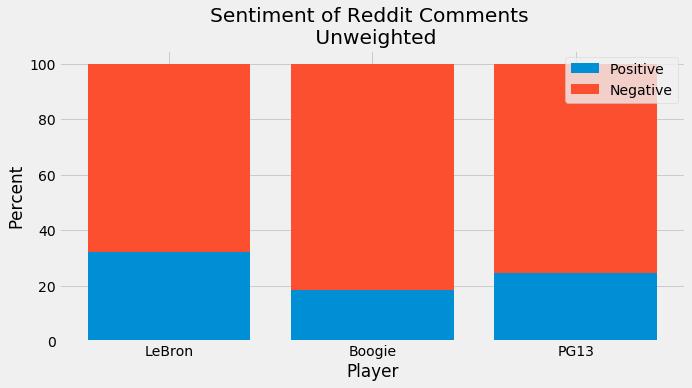

In [27]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = [10, 5]

neg = np.array([67.86,81.42,75.23])
pos = 100 - neg
ind = np.arange(3) 
p1 = plt.bar(ind, pos)
p2 = plt.bar(ind, neg, bottom = pos)
plt.title('Sentiment of Reddit Comments \n Unweighted')
plt.xlabel('Player')
plt.ylabel('Percent')
plt.xticks(ind, ('LeBron', 'Boogie', 'PG13'))
plt.legend(('Positive', 'Negative'))
plt.show()

## Weighted Model

First, we need to use the API to determine the score for each comment. Then we'll determine the weight as the proportion of each score over the sum of all scores. 

In [22]:
# Instantiate LeBron submission
submission = reddit.submission(url='https://www.reddit.com/r/nba/comments/8ve9rs/withers_lebron_signing_with_lakers/')

# We need the comment ID to determine score
ids = []
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    ids.append(top_level_comment.id)

# Remember that we took out the first comment, so only append from 1 onward 
# List that will contain our scores 
votes_lebron = []
for id_no in ids[1:]: 
    comment = reddit.comment(id = id_no)
    votes_lebron.append(comment.score)

In [20]:
input_data = format_words(lebron)
pos = 0
neg = 0

for i in range(len(input_data)):
    result = classifier.classify(input_data[i])
    prop = np.float(votes_lebron[i])/np.sum(votes_lebron)
    if result == 'negative':
        neg = neg + (1*prop)
    if result == 'positive':
        pos = pos + (1*prop)
        
print('About {}% of comments regarding LeBron\'s move were negative.'.format(round((float(neg)/(neg+pos)*100), 2)))

About 68.61% of comments regarding LeBron's move were negative.


In [21]:
# Instantiate Boogie submission
submission = reddit.submission(url='https://www.reddit.com/r/nba/comments/8vnrvy/charania_free_agent_demarcus_cousins_has_agreed/')

# We need the comment ID to determine score
ids = []
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    ids.append(top_level_comment.id)

# Remember that we took out the first comment, so only append from 1 onward 
# List that will contain our scores 
votes_boogie = []
for id_no in ids[1:]: 
    comment = reddit.comment(id = id_no)
    votes_boogie.append(comment.score)

In [22]:
input_data = format_words(boogie)
pos = 0
neg = 0

for i in range(len(input_data)):
    result = classifier.classify(input_data[i])
    prop = np.float(votes_boogie[i])/np.sum(votes_boogie)
    if result == 'negative':
        neg = neg + (1*prop)
    if result == 'positive':
        pos = pos + (1*prop)
        
print('About {}% of comments regarding Boogie\'s move were negative.'.format(round((float(neg)/(neg+pos)*100), 2)))

About 89.24% of comments regarding Boogie's move were negative.


In [110]:
# Instantiate the thread we're using 
submission = reddit.submission(url='https://www.reddit.com/r/nba/comments/8v7ac7/wojnarowski_paul_george_has_committed_to_sign_a/')

# We need the comment ID to determine score
ids = []
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    ids.append(top_level_comment.id)

# Remember that we took out the first comment, so only append from 1 onward 
# List that will contain our scores 
votes_pg = []
for id_no in ids[1:]: 
    comment = reddit.comment(id = id_no)
    votes_pg.append(comment.score)

In [24]:
input_data = format_words(pg)
pos = 0
neg = 0

for i in range(len(input_data)):
    result = classifier.classify(input_data[i])
    prop = np.float(votes_pg[i])/np.sum(votes_pg)
    if result == 'negative':
        neg = neg + (1*prop)
    if result == 'positive':
        pos = pos + (1*prop)
        
print('About {}% of comments regarding PG\'s move were negative.'.format(round((float(neg)/(neg+pos)*100), 2)))

About 71.13% of comments regarding PG's move were negative.


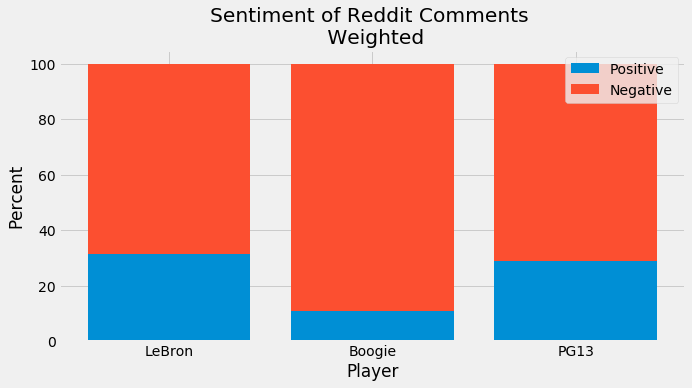

In [28]:
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = [10, 5]

neg = np.array([68.61,89.24,71.13])
pos = 100 - neg
ind = np.arange(3) 
p1 = plt.bar(ind, pos)
p2 = plt.bar(ind, neg, bottom = pos)
plt.title('Sentiment of Reddit Comments \n Weighted')
plt.xlabel('Player')
plt.ylabel('Percent')
plt.xticks(ind, ('LeBron', 'Boogie', 'PG13'))
plt.legend(('Positive', 'Negative'))
plt.show()

# Part Four: Improved Models

From skimming the comment threads, they don't seem to actually be this negative. It turns out that the model classifies any words it's unfamiliar with as negative, which leads to an emormous overestimation of negative words. The words the model is trained on are all properly spelled and punctuated, which is not representative of the nature of reddit coments. 

There is no available corpus in the NLTK library for reddit comments, so let's try using the twitter_samples and sentence_polarity. 

## Twitter Samples

In [21]:
from nltk.corpus import twitter_samples

def format_tweets(tweets, tweet_type):
    # TWEET_TYPE MUST BE EITHER positive OR negative
    
    # First, clean the tweets (replace smileys, change format to string, tokenize words)
    for i in range(len(tweets)):
        tweets[i] = tweets[i].replace(':', "").replace(')', '').replace('(', '').replace('\\', '').replace('/', '')
        # tweets[i] = tweets[i].encode('ascii', 'ignore')
        tweets[i] = word_tokenize(tweets[i])
    
    # Create a list that will contain the dictionary of words in each tweet
    words = []
    for tweet in tweets:
        # Remove stopwords
        useful_words = [word for word in tweet if word not in stopwords.words('english')]
        # Create dictionary
        my_dict = dict([(word, True) for word in useful_words])
        # Append to words
        words.append((my_dict, tweet_type))
    # Return final list
    return(words)

negative = twitter_samples.strings('negative_tweets.json')
neg_tweets = format_tweets(negative, 'negative')
positive = twitter_samples.strings('positive_tweets.json')
pos_tweets = format_tweets(positive, 'positive')

In [124]:
# Train, test, evaluate 
train = neg_tweets[1650:] + pos_tweets[1650:]
test = neg_tweets[:1650] + pos_tweets[:1650]
classifier = NaiveBayesClassifier.train(train)
accuracy = nltk.classify.util.accuracy(classifier, test)
print('The accuracy of the twitter_samples model is {}.'.format(accuracy * 100))

The accuracy of the twitter_samples model is 75.51515151515152.


In [117]:
# Test it on LeBron
input_data = format_words(lebron)
pos = 0
neg = 0
for comment in input_data:
    result = classifier.classify(comment)
    if result == 'negative':
        neg = neg + 1
    if result == 'positive':
        pos = pos + 1
print('About {}% of comments regarding LeBron\'s move were negative based on the twitter_samples model.'.format(round((float(neg)/(neg+pos)*100), 2)))

input_data = format_words(pg)
pos = 0
neg = 0

for i in range(len(input_data)):
    result = classifier.classify(input_data[i])
    if result == 'negative':
        neg = neg + (1)
    if result == 'positive':
        pos = pos + (1)
        
print('About {}% of comments regarding PG\'s move were negative based on the twitter_sampels model.'.format(round((float(neg)/(neg+pos)*100), 2)))

input_data = format_words(boogie)
pos = 0
neg = 0

for i in range(len(input_data)):
    result = classifier.classify(input_data[i])
    if result == 'negative':
        neg = neg + (1)
    if result == 'positive':
        pos = pos + (1)
        
print('About {}% of comments regarding Boogie\'s move were negative based on the twitter_samples model.'.format(round((float(neg)/(neg+pos)*100), 2)))

About 60.71% of comments regarding LeBron's move were negative based on the twitter_samples model.
About 66.06% of comments regarding PG's move were negative based on the twitter_sampels model.
About 69.03% of comments regarding Boogie's move were negative based on the twitter_samples model.


## Sentence Polarity

In [100]:
from nltk.corpus import sentence_polarity
pos = sentence_polarity.open('rt-polarity.pos').read().split('\n')
neg = sentence_polarity.open('rt-polarity.neg').read().split('\n')
# format_tweets accomplishes all the cleaning we want here
positive = format_tweets(pos, 'positive')
negative = format_tweets(neg, 'negative')

In [122]:
# Train, test, evaluate 
train = neg_tweets[1760:] + pos_tweets[1760:]
test = neg_tweets[:1760] + pos_tweets[:1760]
classifier = NaiveBayesClassifier.train(train)
accuracy = nltk.classify.util.accuracy(classifier, test)
print('The accuracy of the sentence_polarity model is {}.'.format(accuracy * 100))

The accuracy of the sentence_polarity model is 75.48295454545455.


In [129]:
# Test it on LeBron
input_data = format_words(lebron)
pos = 0
neg = 0
for comment in input_data:
    result = classifier.classify(comment)
    if result == 'negative':
        neg = neg + 1
    if result == 'positive':
        pos = pos + 1
print('About {}% of comments regarding LeBron\'s move were negative based on the sentence_polarity model.'.format(round((float(neg)/(neg+pos)*100), 2)))

input_data = format_words(pg)
pos = 0
neg = 0

for i in range(len(input_data)):
    result = classifier.classify(input_data[i])
    if result == 'negative':
        neg = neg + (1)
    if result == 'positive':
        pos = pos + (1)
        
print('About {}% of comments regarding PG\'s move were negative based on the sentence_polarity model.'.format(round((float(neg)/(neg+pos)*100), 2)))

input_data = format_words(boogie)
pos = 0
neg = 0

for i in range(len(input_data)):
    result = classifier.classify(input_data[i])
    if result == 'negative':
        neg = neg + (1)
    if result == 'positive':
        pos = pos + (1)
        
print('About {}% of comments regarding Boogie\'s move were negative based on the sentence_polarity model.'.format(round((float(neg)/(neg+pos)*100), 2)))

About 60.71% of comments regarding LeBron's move were negative based on the sentence_polarity model.
About 66.06% of comments regarding PG's move were negative based on the sentence_polarity model.
About 69.03% of comments regarding Boogie's move were negative based on the sentence_polarity model.


### Conclusion: 
It's clear that the twitter samples and sentence polarity corpuses give better results than the opinion_lexicon corpus. They give very similar results, so the choice here isn't especially substantial. I'll select the sentence_polarity model since the sentences here are in longer form than the twitter comments, and so they therefore mirror reddit comments better. 

# Part Five: Final Model/Final Results

## Unweighted Model

The results are shown in the previous section are reflected in the plot below. 

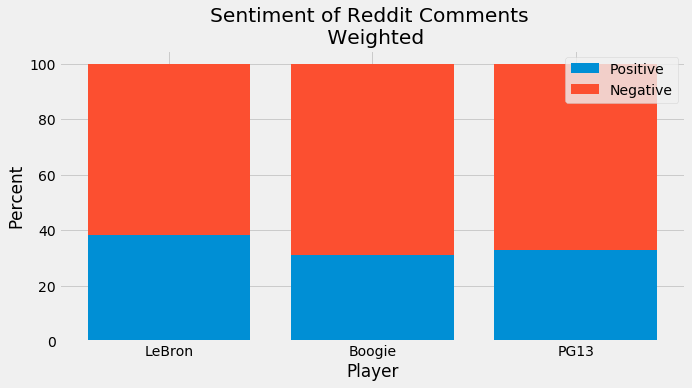

In [128]:
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = [10, 5]
neg = np.array([60.71,69.03,66.06])
pos = 100 - neg
ind = np.arange(3) 
p1 = plt.bar(ind, pos)
p2 = plt.bar(ind, neg, bottom = pos)
plt.title('Sentiment of Reddit Comments \n Weighted')
plt.xlabel('Player')
plt.ylabel('Percent')
plt.xticks(ind, ('LeBron', 'Boogie', 'PG13'))
plt.legend(('Positive', 'Negative'))
plt.show()

## Weighted

In [134]:
# Instantiate LeBron submission
submission = reddit.submission(url='https://www.reddit.com/r/nba/comments/8ve9rs/withers_lebron_signing_with_lakers/')

# We need the comment ID to determine score
ids = []
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    ids.append(top_level_comment.id)

# Remember that we took out the first comment, so only append from 1 onward 
# List that will contain our scores 
votes_lebron = []
for id_no in ids[1:]: 
    comment = reddit.comment(id = id_no)
    votes_lebron.append(comment.score)
    
input_data = format_words(lebron)
pos = 0
neg = 0

for i in range(len(input_data)):
    result = classifier.classify(input_data[i])
    prop = np.float(votes_lebron[i])/np.sum(votes_lebron)
    if result == 'negative':
        neg = neg + (1*prop)
    if result == 'positive':
        pos = pos + (1*prop)
        
print('About {}% of comments regarding LeBron\'s move were negative.'.format(round((float(neg)/(neg+pos)*100), 2)))


# Instantiate PG submission
submission = reddit.submission(url='https://www.reddit.com/r/nba/comments/8v7ac7/wojnarowski_paul_george_has_committed_to_sign_a/')

# We need the comment ID to determine score
ids = []
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    ids.append(top_level_comment.id)

# Remember that we took out the first comment, so only append from 1 onward 
# List that will contain our scores 
votes_pg = []
for id_no in ids[1:]: 
    comment = reddit.comment(id = id_no)
    votes_pg.append(comment.score)
    
input_data = format_words(pg)
pos = 0
neg = 0

for i in range(len(input_data)):
    result = classifier.classify(input_data[i])
    prop = np.float(votes_pg[i])/np.sum(votes_pg)
    if result == 'negative':
        neg = neg + (1*prop)
    if result == 'positive':
        pos = pos + (1*prop)
        
print('About {}% of comments regarding PG\'s move were negative.'.format(round((float(neg)/(neg+pos)*100), 2)))


# Instantiate Boogie submission
submission = reddit.submission(url='https://www.reddit.com/r/nba/comments/8vnrvy/charania_free_agent_demarcus_cousins_has_agreed/')

# We need the comment ID to determine score
ids = []
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    ids.append(top_level_comment.id)

# Remember that we took out the first comment, so only append from 1 onward 
# List that will contain our scores 
votes_boogie = []
for id_no in ids[1:]: 
    comment = reddit.comment(id = id_no)
    votes_boogie.append(comment.score)
    
input_data = format_words(boogie)
pos = 0
neg = 0

for i in range(len(input_data)):
    result = classifier.classify(input_data[i])
    prop = np.float(votes_boogie[i])/np.sum(votes_boogie)
    if result == 'negative':
        neg = neg + (1*prop)
    if result == 'positive':
        pos = pos + (1*prop)
        
print('About {}% of comments regarding Boogie\'s move were negative.'.format(round((float(neg)/(neg+pos)*100), 2)))

About 81.11% of comments regarding LeBron's move were negative.
About 79.02% of comments regarding PG's move were negative.
About 68.27% of comments regarding Boogie's move were negative.


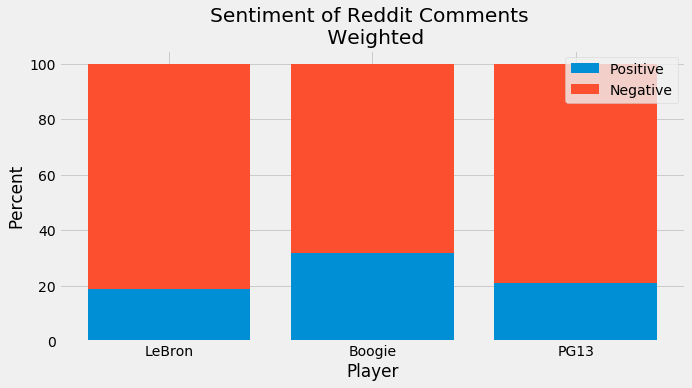

In [135]:
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = [10, 5]
neg = np.array([81.11,68.27,79.05])
pos = 100 - neg
ind = np.arange(3) 
p1 = plt.bar(ind, pos)
p2 = plt.bar(ind, neg, bottom = pos)
plt.title('Sentiment of Reddit Comments \n Weighted')
plt.xlabel('Player')
plt.ylabel('Percent')
plt.xticks(ind, ('LeBron', 'Boogie', 'PG13'))
plt.legend(('Positive', 'Negative'))
plt.show()

# Part Four: Conclusions

## Interpretation of Results

In the unweighted model, the order of negativity from least to greatest is LeBron, PG13, and Boogie. In the weighted model, the order reverses - Boogie, PG12, LeBron. How could this be? 

Context is incredibly important here as far as interpreting what negativity truly means. It doesn't inherently mean that users are lambasting the decision itself, or the player themselves. For the Paul George decision, much of the thread focused on how bad Lakers fans feel or how unexpected the decision was given the expectation that PG would go to the Lakers. For LeBron, many users were incredibly shocked, using words like fuck and shit frequently. The only thread analyzed where the majority of negative comments were in fact lambasting the move itself was with DeMarcus Cousins, which was to be expected given the narrative of a fifth All-Star joining one of the best teams of all time. But still, many of these comments were expressing major shock, again using words like fuck (outside of "fuck the warriors/fuck boogie"). 

Because there are also high rates of misclassification in the model, misclassified entries can dramatically skew the weighted model. Therefore, I find it best to select the unweighted model. 


## Limitations
There are also big shortcomings in the model. First, the data wasn't trained on reddit comments, so the model and accuracy are hardly representative of the comments we're passing through. Thus, we have a much higher proportion of negative words, becuase the classifier determines any word it doesn't understand is negative.

Second, it can't determine context from certain neutral phrases. For example, "Holy fuck!" or "Holy shit!" show up very frequently, but both "fuck" and "shit" are counted as "negative" words. So "Holy fuck this is amazing!" can be considered negative if fuck is weighted more negative than amazing is weighted positive. 

All in all, the model needs to be trained much more to derive stronger conclusions from these sorts of threads. As is, however, they give us good insight on an ordinal level. We can certainly conclude that LeBron's decision was the most well-received move compared to the others. The extent can be determined with future analysis. 